dimensions de X (2, 100)
dimensions de y (1, 100)


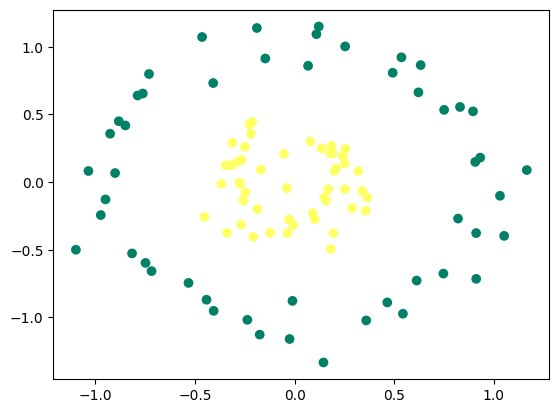

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape(1, y.shape[0])

print('dimensions de X', X.shape)
print('dimensions de y', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

Intialisation des paramètres

In [262]:
def initialisation(n0, n1, n2):
    '''
    :n0: nombre d'entrées du réseau
    :n1: nombre de neurones dans la couche n-1 (précédente)
    :n2: nombre de neurones dans la couche n (courante)
    '''
    # couche 1
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    # couche 2
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    model_params = {"W1" : W1, "b1" : b1,"W2": W2,  "b2" :b2}

    return model_params

Définition du model

In [263]:
# model devient forward_propagation
def forward_propagation(X, model_params):
    W1 = model_params['W1']
    b1 = model_params['b1']
    W2 = model_params['W2']
    b2 = model_params['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1+np.exp(-Z1)) # fonction d'activation: sigmoid

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1+np.exp(-Z2)) # fonction d'activation: sigmoid

    activations = {'A1':A1, 'A2':A2}
    return activations

Fonction de coût du model suivant le log loss

In [264]:
def log_loss(A, y):
    # on rajoute epsilon pour éviter des valeur nulle dans le log
    epsilon = 1.e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

Calcul du gradient descendent

In [265]:
# gradients devient back_propagation
def back_propagation(X, y, activations, model_params):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = model_params['W2']

    m = y.shape[1]
    # gradients couche 1
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # gradients couche 2
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {'dW1' : dW1, 'db1' : db1, 'dW2' : dW2, 'db2' : db2}
    return gradients

Mise à jour des poids de variable pour la prochaine itération

In [266]:
def update(gradients, model_params, learning_rate):
    # couche 1
    model_params['W1'] = model_params['W1'] - learning_rate * gradients['dW1']
    model_params['b1'] = model_params['b1'] - learning_rate * gradients['db1']

    # couche 2
    model_params['W2'] = model_params['W2'] - learning_rate * gradients['dW2']
    model_params['b2'] = model_params['b2'] - learning_rate * gradients['db2']

    return model_params # valeur du modèle appris qui serviront à de futurs prédictions

Pour faire la prédiction à partir du modèle

In [267]:
def predict(X, model_params):
    activation = forward_propagation(X, model_params)
    # la valeur du simoig est compris entre 0 et 1
    # print(A) # activation (probabilité) associée à l'élément
    return activation['A2'] >= 0.5

Implémentation du réseau de neurone

In [268]:
from sklearn.metrics import accuracy_score
# gestion de la progression
%pip install tqdm
from tqdm import tqdm

In [269]:
# artifical_neural devient neural_network
def neural_network(X_train, y_train, X_test, y_test, n1, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    
    model_params = initialisation(n0, n1, n2)

    # Liste des valeurs: si décroissance, alors le modele apprend en réduisant les erreurs
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, model_params)
        gradients = back_propagation(X_train, y_train, activations, model_params)
        model_params = update(gradients, model_params, learning_rate)

        if i % 10 == 0:
            # Train: calculs des metrics chaque 10 iter
            train_loss.append(log_loss(activations['A2'], y_train))
            y_pred = predict(X_train, model_params)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten())) # .flatten() pour aplatir le tableu

            # Test
            # on fait un calcul de A sur le jeu de test 
            # A_test = forward_propagation(X_test, model_params)

            # test_loss.append(log_loss(A_test['A2'], y_test))
            # y_pred = predict(X_test, model_params)
            # test_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))

    
    # affichage de l'évolution des erreurs
    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.legend()
    # précision du modèle
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train acc")
    plt.legend()
    plt.show()

    return model_params

Exercice de prédiction Cats - Dogs avec le modèle précédent

In [270]:
%pip install h5py
from utilities import *

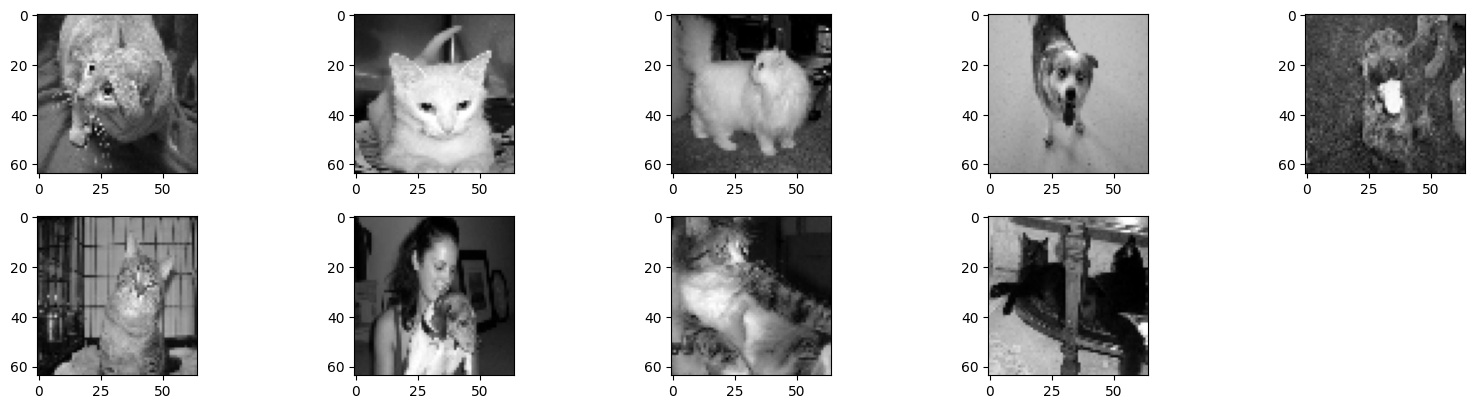

(1000, 64, 64)
(200, 64, 64)
(1000, 1)
(200, 1)


In [271]:
X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(16,8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.tight_layout()    
plt.show()


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Le modèle étant entrainer sur un tableau à 2 dimension, pour nos images en 3D, il faut reshape les entrées. 
Cela se fait en applatissant nos images de 64x64 en ligne, ce qui donnera 4096.
Donc, on fini par un tableau de 1000,4096

In [272]:
y_train = y_train.T
y_test = y_test.T

# la division ici joue le role de normalisation (MinMax) : X = (X - min) / (max - min)
X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

# autres params
m_train = 300
m_test = 80

X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]

y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]


print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)


(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


Entrainement sur le jeu de donnée des images

100%|██████████| 8000/8000 [02:46<00:00, 47.94it/s]


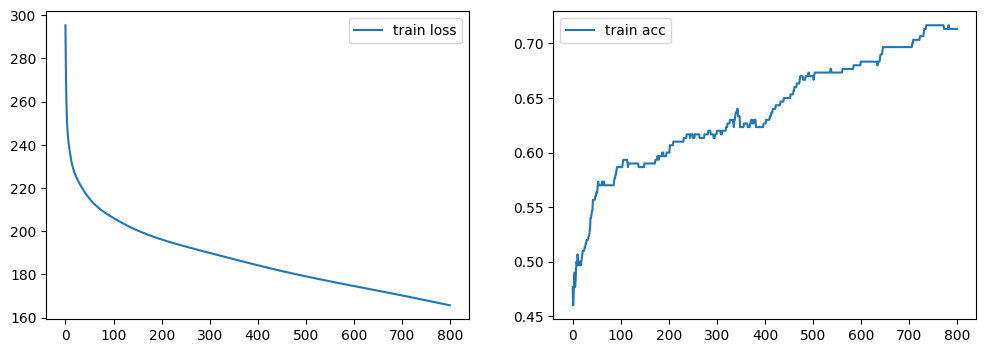

In [273]:
model_params = neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.01, n_iter=8000)